# **DATA SCIENCE ASSIGNMENT - II**

# Submitted by


*   106117017 - Avi Bomb
*   106117019 - Charan Kumar
*   106117024 - Dhiraj Kumar
*   106117075 - Suraksha
*   106117107 - Vidhya Lakshmi B








---


# **1. Predicting Male/Female based on Height and Weight of a person.**

 Dataset details
 1. Number of Samples = 500.
 2. Number of columns = 3 (Height, Weight and Target).
 3. First Column (Height) is in micrometer (range 1000000 to 1700000).
 4. Second Column (Weight) is in kg (range 40 to 150).
 5. Target (y) is gender (Male/Female).

---



In [1]:
# Import pandas for data processing and I/O of CSV file 
import pandas as pd 
# Import pandas for linear algebra
import numpy as np

In [2]:
# Mount to read data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the Features and Target dataset from Google Drive
features = pd.read_csv('/content/drive/My Drive/features.csv', low_memory = False, names=['Height', 'Weight'])
target = pd.read_csv('/content/drive/My Drive/target.csv', names=['Gender'])

In [4]:
print(features)

           Height      Weight
0    1.417837e+06  130.331364
1    1.170866e+06  114.834354
2    1.326528e+06   52.048800
3    1.436353e+06   56.271637
4    1.667446e+06  112.761949
..            ...         ...
495  1.070062e+06   89.464539
496  1.464367e+06   98.961825
497  1.342927e+06   40.139589
498  1.476000e+06   78.434960
499  1.518822e+06  119.876434

[500 rows x 2 columns]


In [5]:
print(target)

     Gender
0      Male
1    Female
2    Female
3    Female
4      Male
..      ...
495  Female
496    Male
497  Female
498    Male
499    Male

[500 rows x 1 columns]




---


# 1.a. Visualize the dataset using a plot.

---



In [6]:
group = np.array([], int)
for i in target['Gender']:
  to_append = np.array([i])
  group = np.append(group, to_append)
print(len(group))

scatter_x = np.array([])
scatter_y = np.array([])
for i in features['Height']:
  to_append = np.array([i])
  scatter_x = np.append(scatter_x, to_append)
print(len(scatter_x))
for i in features['Weight']:
  to_append = np.array([i])
  scatter_y = np.append(scatter_y, to_append)
print(len(scatter_y))

500
500
500


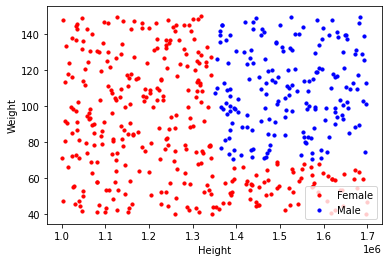

In [7]:
# Import matplotlib and seaborn to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
cdict = {'Male': 'blue', 'Female': 'red'}
fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 10)
ax.legend()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

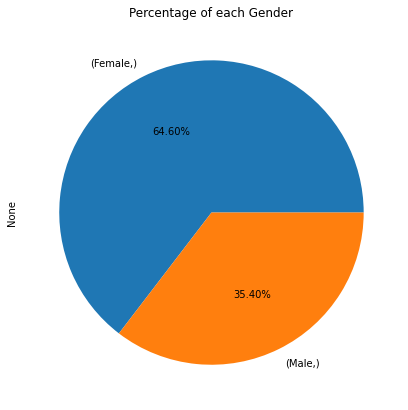

In [8]:
# Visualizing the percentage of each Gender in target class using pie chart
fig, axs = plt.subplots(1,1,figsize=(14,7))
target.value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')
axs.set_title("Percentage of each Gender")
plt.show()



---


## 1.a. Apply Decision Tree Algorithm - Insensitive to large scale difference between Height and Weight

---



In [9]:
# Import model_selection to split the data for Training and Testing
from sklearn import model_selection
# Initialize parameter values for model_selection.train_tet_split() function
test_size = 0.33
seed = 7
# Split data into Training and Testing data
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size=test_size, random_state=seed)

In [10]:
# Import tree to fit the training data into a Decision Tree Algorithm
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# Fit the Training Data and Train the Decision Tree
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(535.6800000000001, 634.1999999999999, 'X[0] <= 1349001.0\ngini = 0.449\nsamples = 335\nvalue = [221, 114]'),
 Text(267.84000000000003, 380.52, 'gini = 0.0\nsamples = 171\nvalue = [171, 0]'),
 Text(803.5200000000001, 380.52, 'X[1] <= 69.781\ngini = 0.424\nsamples = 164\nvalue = [50, 114]'),
 Text(535.6800000000001, 126.84000000000003, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(1071.3600000000001, 126.84000000000003, 'gini = 0.0\nsamples = 114\nvalue = [0, 114]')]

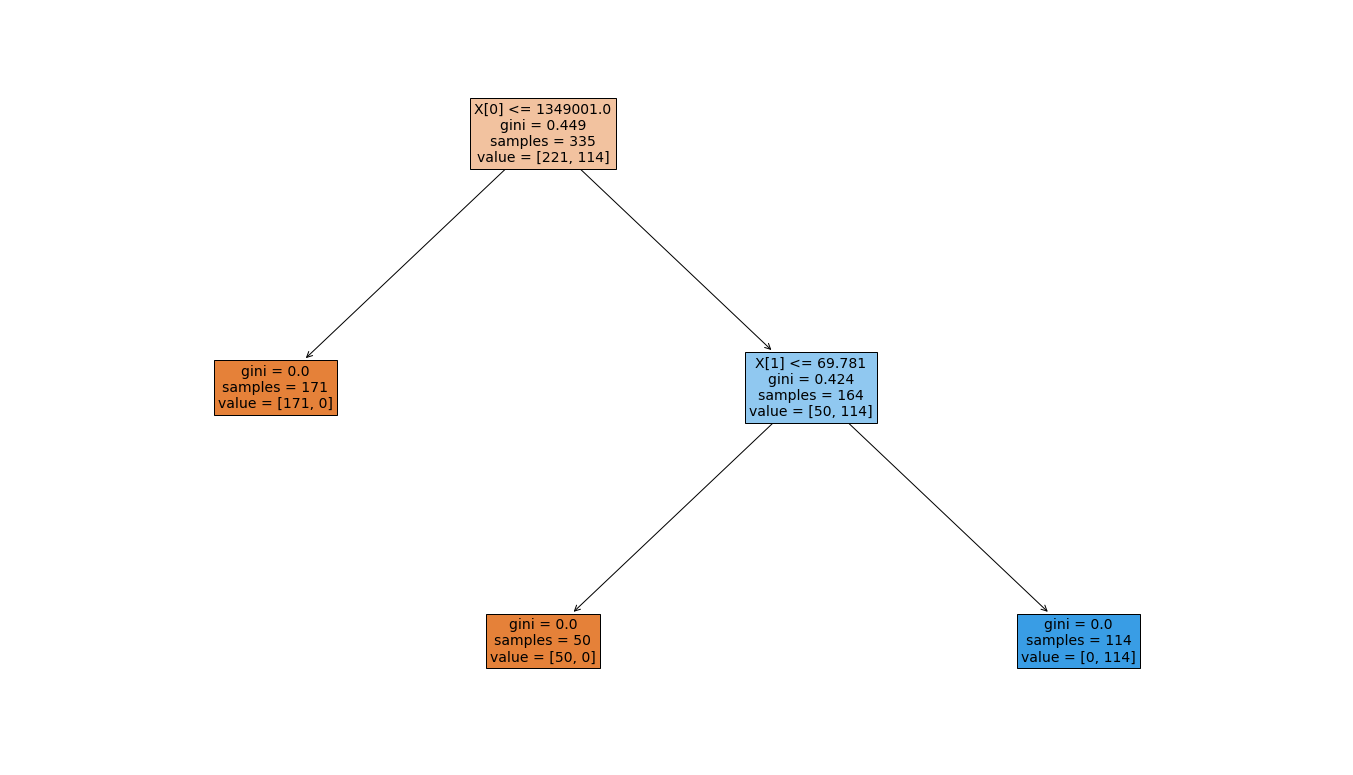

In [11]:
# Output the Decision Tree
%matplotlib inline
plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14)



---


## 1.a. Calculate the evaluation metrics → Accuracy, Precision, Recall, F1 Score, Confusion Matrix.

---



In [12]:
# Cross-validation settings
kfold = model_selection.KFold(n_splits=10)
# Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(clf, features, target, cv=kfold, scoring=scoring)
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

Accuracy -val set: 100.00% (0.00)


In [13]:
# Calculate Accuracy using testing data
# Accuracy = No. of Correct Predictions / Total No. of Predictions Made
result = clf.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - test set: 100.00%


In [14]:
# Import confusion_matrix to construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
# Predict Target of Test data features
pred = clf.predict(X_test)
# Construct the Confusion Matrix using Predicted Target and Actual Test data Target
labels = ['Male', 'Female']
cm = confusion_matrix(y_test, pred, labels)
print(cm)

[[ 63   0]
 [  0 102]]


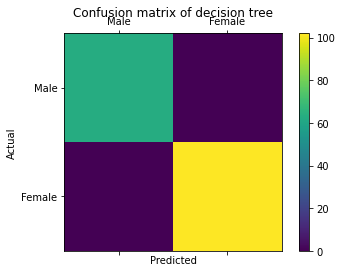

In [15]:
# Show confusion matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of decision tree')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Import libraries to calculate Precision, Recall and F1 score using Predicted Target class and Test data
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
# Calculate Precision: tp / (tp + fp)
precision = precision_score(y_test, pred, labels=None, pos_label=1, average=None, sample_weight=None, zero_division='warn')
print(precision)

[1. 1.]


In [17]:
# Calculate Recall: tp / (tp + fn)
recall = recall_score(y_test, pred, labels=None, pos_label=1, average=None, sample_weight=None, zero_division='warn')
print(recall)

[1. 1.]


In [18]:
# Calculate f1 score: tp / (tp + fp + fn)
f1 = f1_score(y_test, pred, labels=None, pos_label=1, average=None, sample_weight=None, zero_division='warn')
print(f1)

[1. 1.]


In [19]:
# Import classification_report to calculate Accuracy, Precision, Recall and F1 Score using Predicted Target and Actual Test data Target
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       102
        Male       1.00      1.00      1.00        63

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165





---


### It is observed that on splitting the dataset (total of 500 samples) into 335 train samples, 165 test samples and training the Decision Tree algorithm over the dataset):

###1.   Precision = 1
###2.   Recall = 1
###3.   F1 Score = 1
###4.   The average Precision, Recall and F1 Score is 1
###5.   In confusion Matrix: FP = 0 and FN = 0
###6.   100% Accuracy in a balanced dataset. High F1 score tells that accuracy score is reliable and is not affected by class imbalance.
###7.   Support for these evaluation metrices = 165 entries

### The Decision Tree Algorithm predicts Male/Female with high accuracy, precision and recall. From these we can say that the Decision Tree Model is trained properly and it's Predictions are more reliable.

---






---


# 1.b. Apply k-Nearest Neighbour algorithm - Before Feature Normalization.

---



Text(0, 0.5, 'Error Rate')

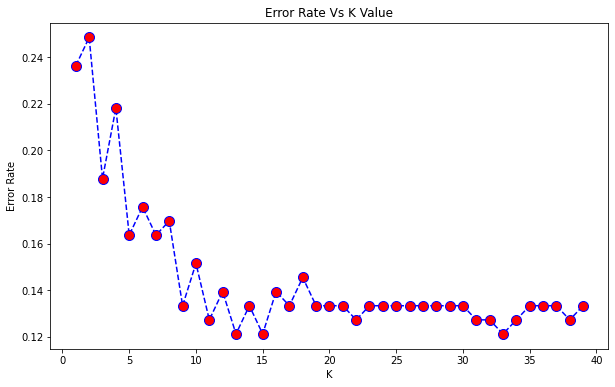

In [20]:
# Import KNeighborsClassifier to fit the training data into the
from sklearn.neighbors import KNeighborsClassifier
# Find the best value for “k” by fitting the train data and calculating error rate using test data, predicted target
error_rate = []
y_train = np.array(y_train).ravel()
for i in range(1,40):  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  pred_i = pred_i.reshape(165,1)
  error_rate.append(np.mean(pred_i != y_test))
# Plot the Error Rate vs K-Value curve
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
# Fit the Training Data and Train the classifier with k = 9 (Minimum error rate)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [22]:
# Predict target class using test data features
predicted = knn.predict(X_test)



---


## 1.b. Calculate the evaluation metrics → Accuracy, Precision, Recall, F1 Score, Confusion Matrix.

---



In [23]:
# Construct the Confusion Matrix using Predicted Target and Actual Test data Target
matrix = confusion_matrix(y_test,predicted)
print(matrix)

[[82 20]
 [ 2 61]]


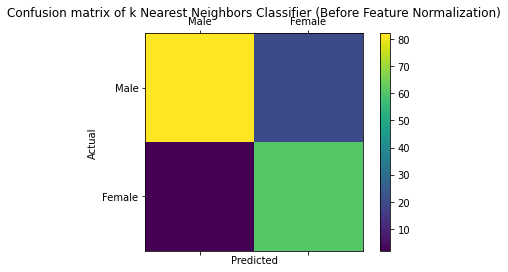

In [24]:
# Show confusion matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
plt.title('Confusion matrix of k Nearest Neighbors Classifier (Before Feature Normalization)')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
print(predicted)

['Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female'
 'Female' 'Male' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male'
 'Male' 'Male' 'Female' 'Female' 'Male' 'Female' 'Female' 'Male' 'Female'
 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Male' 'Female' 'Female' 'Female'
 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male' 'Female'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female'
 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male' 'Female'
 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Male' 'Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Female'
 'Male' 'Female' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male'
 'Female' 

In [26]:
# Calculate Accuracy, Precision, Recall and F1 Score using Predicted Target and Actual Test data Target
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

      Female       0.98      0.80      0.88       102
        Male       0.75      0.97      0.85        63

    accuracy                           0.87       165
   macro avg       0.86      0.89      0.86       165
weighted avg       0.89      0.87      0.87       165





---



### It is observed that on splitting the dataset (total of 500 samples) into 335 train samples, 165 test samples and training K-nearest neighbour algorithm over the dataset, using the optimal value of k = 9 (minimum error):

###1.   Precision = [0.98 , 0.75]
###2.   Recall = [0.80, 0.97]
###3.   F1 Score = [0.88, 0.85]
###4.   The average Precision, Recall and F1 Score is between 0.86 and 0.89 
###5.   In confusion Matrix: FP = 2 and FN = 20 (2 Female wrongly predicted as Male and 20 Male wrongly predicted as Female)
###6.   87% Accuracy in a balanced dataset 
###7.   Support for these evaluation metrices = 165 entries

### From these we can say that the k-Nearest Neighbour Claasifier (Before Feature Normalization) gives some False Predictions and hence less reliable than Decision Tree Model. Normalizing the features might make this better.

---





---


# 1.c. Apply Min-Max Normalization on the given dataset.

## Height and Weight have large scale difference. Apply Min-Max normalization to the features.

---



In [27]:
# Import preprocessing to do Min-Max Normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(features)
df = pd.DataFrame(x_scaled)
df.columns=['Height', 'Weight']
print(df)

       Height    Weight
0    0.597487  0.821137
1    0.243114  0.680047
2    0.466469  0.108426
3    0.624055  0.146872
4    0.955646  0.661179
..        ...       ...
495  0.098472  0.449072
496  0.664252  0.535538
497  0.490000  0.000000
498  0.680944  0.348654
499  0.742388  0.725952

[500 rows x 2 columns]


In [28]:
group = np.array([], int)
for i in target['Gender']:
  to_append = np.array([i])
  group = np.append(group, to_append)
print(len(group))

scatter_x = np.array([])
scatter_y = np.array([])
for i in df['Height']:
  to_append = np.array([i])
  scatter_x = np.append(scatter_x, to_append)
print(len(scatter_x))

for i in df['Weight']:
  to_append = np.array([i])
  scatter_y = np.append(scatter_y, to_append)
print(len(scatter_y))

500
500
500




---


# 1.c. Visualize the dataset using a plot.

---



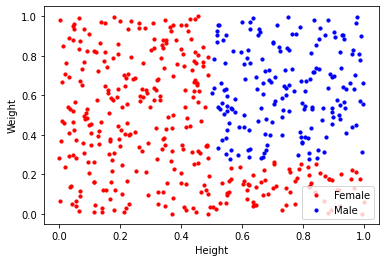

In [29]:
# Use matplotlib to visualize the dataset

cdict = {'Male': 'blue', 'Female': 'red'}
fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 10)
ax.legend()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

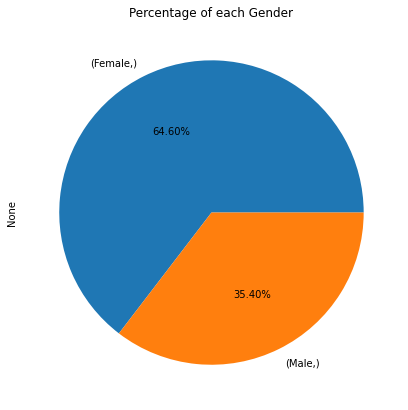

In [30]:
# Visualizing the percentage of each Gender in target class using pie chart
fig, axs = plt.subplots(1,1,figsize=(14,7))
target.value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')
axs.set_title("Percentage of each Gender")
plt.show()



---


# 1.c. Apply k-Nearest Neighbour algorithm on the Normalized dataset.

---



In [31]:
# test_size = 0.33 and seed = 7 are initialized already
# Split data into Training and Testing data
X_nor_train, X_nor_test, y_nor_train, y_nor_test = model_selection.train_test_split(df, target, test_size=test_size, random_state=seed)

Text(0, 0.5, 'Error Rate')

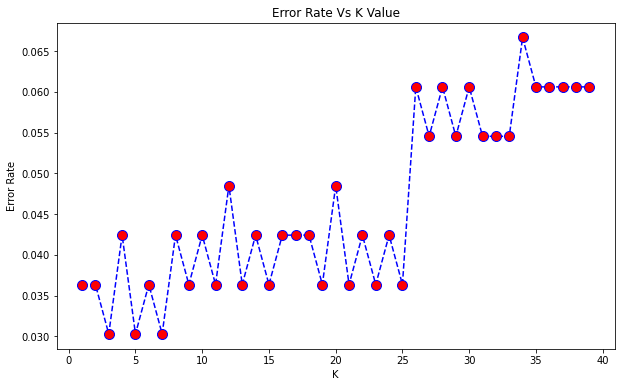

In [32]:
# Find the best value for “k” by fitting the train data and calculating error rate using test data, predicted target
error_rate = []
y_nor_train = np.array(y_nor_train).ravel()
for i in range(1,40):  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_nor_train,y_nor_train)
  pred_i = knn.predict(X_nor_test)
  pred_i = pred_i.reshape(165,1)
  error_rate.append(np.mean(pred_i != y_nor_test))
# Plot the Error Rate vs K-Value curve
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
# Fit the Training Data and Train the classifier with k = 7 (Minimum error rate)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_nor_train,y_nor_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [34]:
# Predict target class using test data features
predicts = knn.predict(X_nor_test)



---


## 1.c. Calculate the evaluation metrics → Accuracy, Precision, Recall, F1 Score, Confusion Matrix.

---



In [35]:
# Construct the Confusion Matrix using Predicted Target and Actual Test data Target
mat = confusion_matrix(y_nor_test,predicts)
print(mat)

[[102   0]
 [  5  58]]


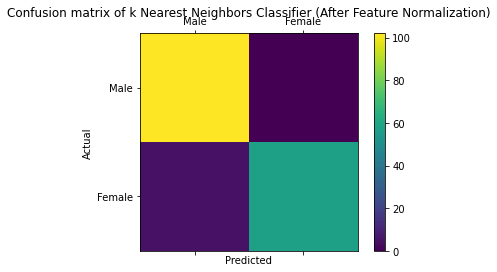

In [36]:
# Show confusion matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(mat)
plt.title('Confusion matrix of k Nearest Neighbors Classifier (After Feature Normalization)')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
# Calculate Accuracy, Precision, Recall and F1 Score using Predicted Target and Actual Test data Target
print(classification_report(y_nor_test,predicts))

              precision    recall  f1-score   support

      Female       0.95      1.00      0.98       102
        Male       1.00      0.92      0.96        63

    accuracy                           0.97       165
   macro avg       0.98      0.96      0.97       165
weighted avg       0.97      0.97      0.97       165





---


### It is observed that on splitting the dataset (total of 500 samples) into 335 train samples, 165 test samples and training K-nearest neighbour algorithm over the dataset, using the optimal value of k = 7 (minimum error):

###1.   Precision = [0.95 , 1.00]
###2.   Recall = [1.00, 0.92]
###3.   F1 Score = [0.98, 0.96]
###4.   The average Precision, Recall and F1 Score is around 0.97 
###5.   In confusion Matrix: FP = 5 and FN = 0 (5 Female wrongly predicted as Male)
###6.   97% Accuracy in a balanced dataset. High F1 score tells that accuracy score is reliable and is not affected by class imbalance.
###7.   Support for these evaluation metrices = 165 entries


### The kNN algorithm predicts Male/Female with high accuracy, precision and recall. The k-Nearest Neighbour Claasifier (After Feature Normalization) gives very less False Predictions and hence more reliable than the k-Nearest Neighbour Classifier Before Feature Normalization.

---





---


## 1.d. Plot ROC curves and calculate the corresponding AUC values for Sections “1. b” and “1. c”.


---



In [38]:
# Import library to plot ROC Curve 
from sklearn.metrics import roc_curve
# Import library to calculate AUC under ROC 
from sklearn.metrics import roc_auc_score
y_test.columns=['Output']
y_test['Output']=y_test.Output.astype(object)
y_nor_test.columns=['Output']
y_nor_test['Output']=y_nor_test.Output.astype(object)
predicts = pd.DataFrame(predicts)
predicts.columns=['Output']
predicts['Output']=predicts.Output.astype(object)
predicted = pd.DataFrame(predicted)
predicted.columns=['Output']
predicted['Output']=predicted.Output.astype(object)
# Map the String in Predicted and Test data Target Class to int (Female:0 and Male:1) to plot ROC and Calculate AUC 
mapping_dict = {"Output":{"Male": 1,"Female": 0}}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
y_test = y_test.replace(mapping_dict)
y_test.head()

,Output
308,0
13,0
414,1
32,0
460,0


In [40]:
y_nor_test = y_nor_test.replace(mapping_dict)
y_nor_test.head()

,Output
308,0
13,0
414,1
32,0
460,0


In [41]:
predicts = predicts.replace(mapping_dict)
predicts.head()

,Output
0,0
1,0
2,1
3,0
4,0


In [42]:
predicted = predicted.replace(mapping_dict)
predicted.head()

,Output
0,0
1,0
2,1
3,1
4,1


In [43]:
# Calculate AUC using Predicted and Test data Target class
auc = roc_auc_score(y_test, predicted)
nor_auc = roc_auc_score(y_nor_test, predicts)
# Summarize AUC scores
print('Before min-max Normalisation: ROC AUC=%.3f' % (auc))
print('After min-max Normalisation: ROC AUC=%.3f' % (nor_auc))

Before min-max Normalisation: ROC AUC=0.886
After min-max Normalisation: ROC AUC=0.960


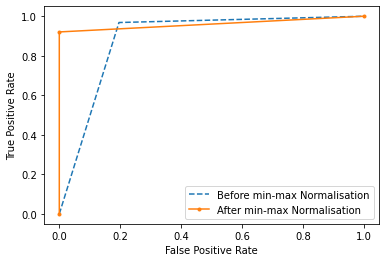

In [44]:
# Calculate False Positive Rate and Ture Positive Rate for plotting ROC curves
# FPR = FP / (FP + TN)
# TPR = TP / (TP + FN)
fpr, tpr, _ = roc_curve(y_test, predicted)
nor_fpr, nor_tpr, _ = roc_curve(y_nor_test, predicts)
# Plot the ROC curve for the K Nearest Neighbor Classifier before and after Feature Normalization
plt.plot(fpr, tpr, linestyle='--', label='Before min-max Normalisation')
plt.plot(nor_fpr, nor_tpr, marker='.', label='After min-max Normalisation')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show the legend
plt.legend()
# Show the plot
plt.show()



---



### The AUC of ROC for the K Nearest Neighbor Classifier which is 
### Trained using Normalized features (0.96) > Trained using the dataset before Feature Normalization (0.886).
### After Feature Normalization, the K Nearest Neighbor Classifier predicts better.


---






---


# **2. Predicting Iris-setosa / Iris-virginica / Iris-versicolor based on**
# **sepal length, sepal width, petal length and petal width of the flower.**

---



In [45]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load IRIS dataset into Pandas DataFrame
# The columns in the inbuilt IRIS data set represents : Sepal Length, Sepal Width, Petal Length, Petal Width and Target.
iris_df = pd.read_csv(url, names=['sepal_length','sepal_width','petal_length','petal_width','target'])
print(iris_df)

     sepal_length  sepal_width  petal_length  petal_width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [46]:
feature = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separating out the features
x = iris_df.loc[:, feature].values
# Separating out the target
y = iris_df.loc[:,['target']].values



---


# 2.a. Visualize the dataset using a plot.

---



<Figure size 432x288 with 0 Axes>

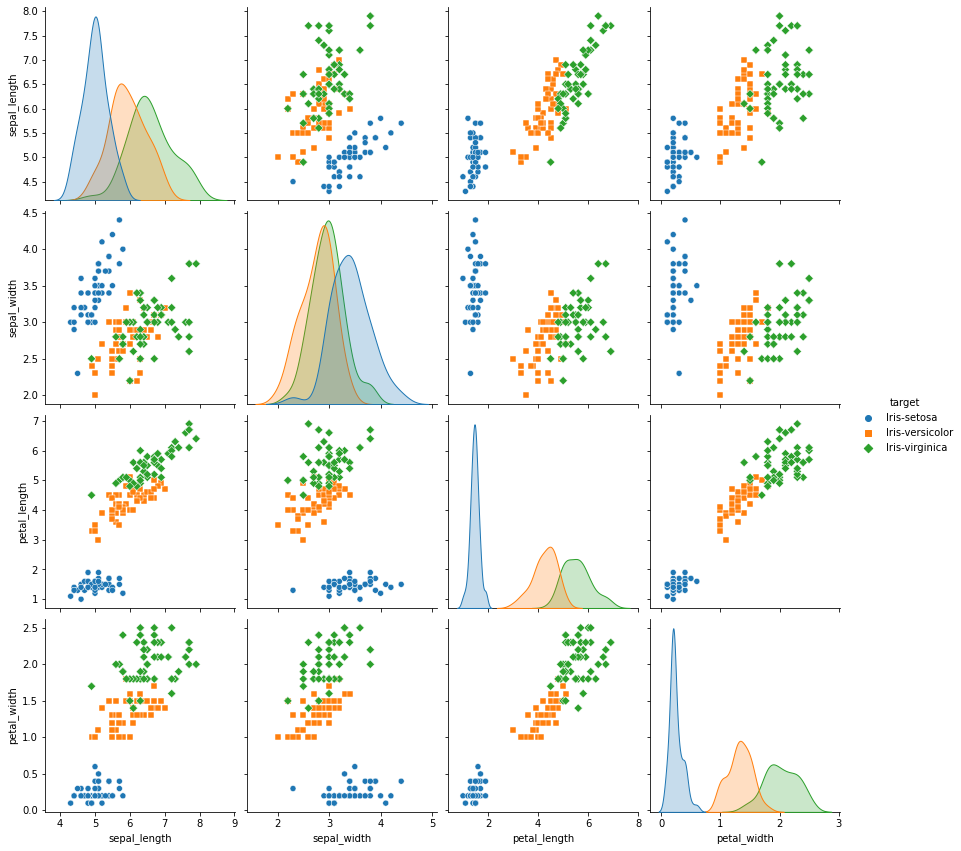

In [47]:
# Data Visualisation of plot between every pair of attributes using Pair Plot
plt.figure()
sns.pairplot(iris_df, hue = "target", height=3, markers=["o", "s", "D"])
plt.show()

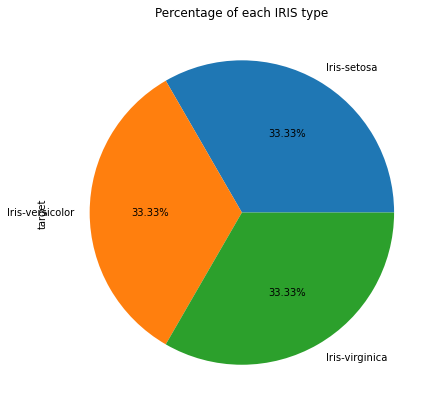

In [48]:
# Visualizing the percentage of each IRIS type in target class using pie chart
fig, axs = plt.subplots(1,1,figsize=(14,7))
iris_df['target'].value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')
axs.set_title("Percentage of each IRIS type")
plt.show()



---


# 2.a. Apply k-Nearest Neighbour algorithm on the dataset.

---



In [49]:
# test_size = 0.33 and seed = 7 are initialized already
# Split data into Training and Testing data
X_iris_train, X_iris_test, y_iris_train, y_iris_test = model_selection.train_test_split(x, y, test_size=test_size, random_state=seed)

Text(0, 0.5, 'Error Rate')

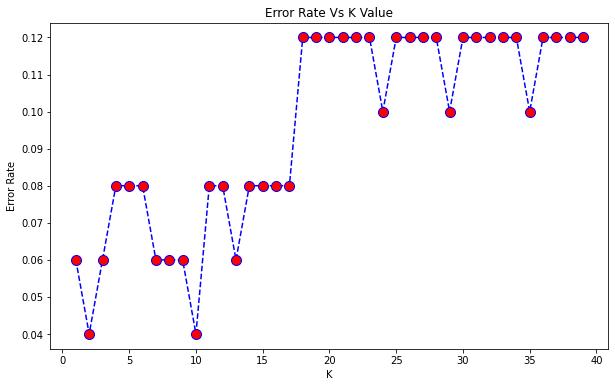

In [50]:
# Find the best value for “k” by fitting the train data and calculating error rate using test data, predicted target
error_rate = []
y_iris_train = np.array(y_iris_train).ravel()
for i in range(1,40):  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_iris_train,y_iris_train)
  pred_i = knn.predict(X_iris_test)
  pred_i = pred_i.reshape(50,1)
  error_rate.append(np.mean(pred_i != y_iris_test))
# Plot the Error Rate vs K-Value curve
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [51]:
# Fit the Training Data and Train the classifier with k = 10 (Minimum error rate)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_iris_train,y_iris_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [52]:
# Predict target class using test data features
predicted_iris = knn.predict(X_iris_test)

---


## 2.a. Calculate the evaluation metrics → Accuracy, Precision, Recall, F1 Score, Confusion Matrix.

---

In [53]:
# Construct the Confusion Matrix using Predicted Target and Actual Test data Target
matrix_iris = confusion_matrix(y_iris_test,predicted_iris)
print(matrix_iris)

[[14  0  0]
 [ 0 18  0]
 [ 0  2 16]]


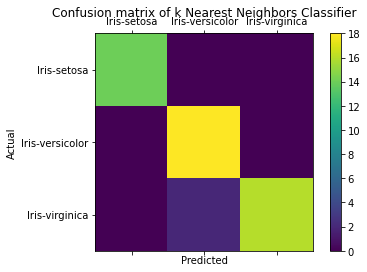

In [54]:
# Show confusion matrix plot
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix_iris)
plt.title('Confusion matrix of k Nearest Neighbors Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
# Calculate Accuracy, Precision, Recall and F1 Score using Predicted Target and Actual Test data Target
print(classification_report(y_iris_test,predicted_iris))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      1.00      0.95        18
 Iris-virginica       1.00      0.89      0.94        18

       accuracy                           0.96        50
      macro avg       0.97      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50




---



### It is observed that on splitting the Inbuilt iris dataset (total of 150 samples) into 100 train samples, 50 test samples and training K-nearest neighbour algorithm over the dataset, using the optimal value of k = 10 (minimum error):

###1.   Precision = [1.00 , 0.90, 1.00]
###2.   Recall = [1.00, 1.00, 0.89]
###3.   F1 Score = [1.00, 0.95, 0.94]
###4.   The average Precision, Recall and F1 Score is around 0.96. 
###5.   In confusion Matrix, number of false predictions = 2 (2 samples of the virginica is labelled wrongly as the versicolor species)
###6.   96% Accuracy in a balanced dataset. High F1 score tells that accuracy score is reliable and is not affected by class imbalance.
###7.   Support for these evaluation metrices = 50 entries

### The kNN algorithm on iris dataset predicts the iris species with high accuracy, precision and recall. From these we can say that the k-Nearest Neighbour Claasifier gives very few False Predictions and hence more reliable.

---




---


## 2.b. Find the possibility of feature dropping using Pearson and Spearman Correlation Coefficient.

---



In [56]:
dt = iris_df[iris_df.columns[0:4]]
print(dt)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [57]:
# Find Pearson Correlation Coefficient using a corr() function whcih returns a dataframe
corr = dt.corr(method="pearson") 
# Eliminate the upper triangle for readability
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
display(corr)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,NaN,NaN,NaN
sepal_width,-0.109369,1.000000,NaN,NaN
petal_length,0.871754,-0.420516,1.000000,NaN
petal_width,0.817954,-0.356544,0.962757,1.0


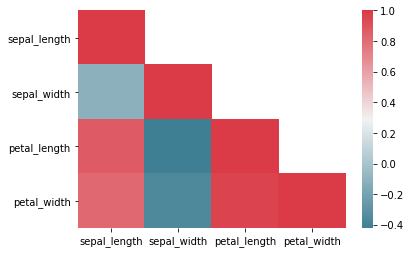

In [58]:
# Plot heatmap for Pearson Correlation Coefficient matrix
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [59]:
# Find Spearman Correlation Coefficient using a corr() function whcih returns a dataframe
corr = dt.corr(method="spearman") 
# Eliminate the upper triangle for readability
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
display(corr)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,NaN,NaN,NaN
sepal_width,-0.159457,1.000000,NaN,NaN
petal_length,0.881386,-0.303421,1.000000,NaN
petal_width,0.834421,-0.277511,0.936003,1.0


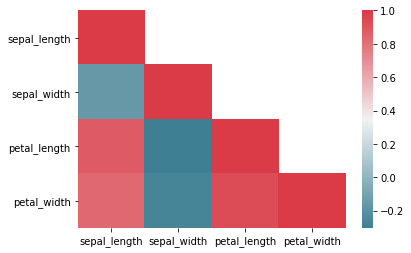

In [60]:
# Plot heatmap for Spearman Correlation Coefficient matrix
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), xticklabels=corr.columns.values, yticklabels=corr.columns.values)



---
### Petal Width and Petal Length has Pearson and Spearman correlation coefficient above 90%. 
### Hence, the feature Petal Width can be dropped. 
### Remaining all Combinations of features have less than 90% Pearson and Spearman correlation coefficient.

---




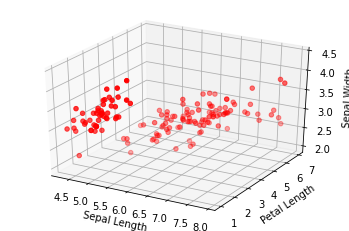

In [61]:
# 3D scattered plot for only remaining three features (Sepal Length, Petal Length, Sepal Width)
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

x=iris_df["sepal_length"]
y=iris_df["petal_length"]
z=iris_df["sepal_width"]

#color=("Iris-setosa", "Iris-virginica", "Iris-versicolor")
#color=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
ax.scatter(x,y,z,c='r',marker='o');

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Sepal Width')

plt.show()

In [62]:
# Drop Petal Width and taking remaining features in dataframe X
features = ['sepal_length', 'sepal_width', 'petal_length']
# Separating out the features
x = iris_df.loc[:, features].values
# Separating out the target
y = iris_df.loc[:,['target']].values



---


## 2.c. If possible, try to reduce the number of features by PCA on the dataset created.

---



In [63]:
# Import library for Standardizing
from sklearn.preprocessing import StandardScaler
# Standardizing the features before applying Principal Component Analysis on the dataset created in Section “2. b”
x = StandardScaler().fit_transform(x)

In [64]:
# Import library for applying Principal Component Analysis on the dataset created
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [65]:
# Dataset with 2 components after applying PCA
finalDf = pd.concat([principalDf, iris_df[['target']]], axis = 1)

In [66]:
print(finalDf)

     principal component 1  principal component 2          target
0                -1.859526               0.449173     Iris-setosa
1                -1.602669              -0.697065     Iris-setosa
2                -1.958848              -0.387732     Iris-setosa
3                -1.874922              -0.639969     Iris-setosa
4                -2.018002               0.605866     Iris-setosa
..                     ...                    ...             ...
145               1.265046               0.389776  Iris-virginica
146               1.290442              -0.868217  Iris-virginica
147               1.112040               0.286127  Iris-virginica
148               0.633096               0.972828  Iris-virginica
149               0.613794              -0.028875  Iris-virginica

[150 rows x 3 columns]


---


# 2.c. Visualize the dataset using a plot.

---

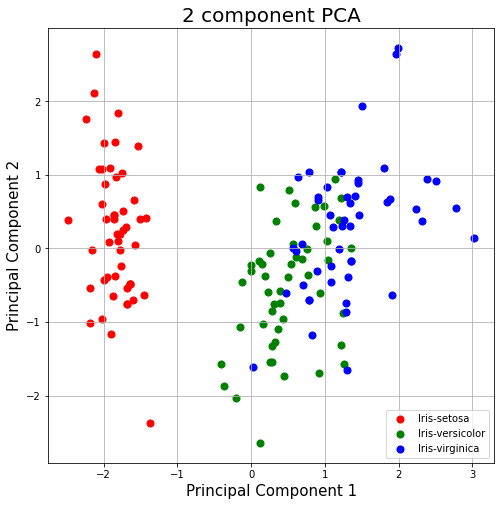

In [67]:
# Plot Data in 2D with Principal Component 1 and Principal Component 2
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [68]:
# Variance ratio along each Principal Component
pca.explained_variance_ratio_

array([0.67127544, 0.30494357])

---


# 2.c. Apply k-Nearest Neighbour algorithm on the dataset.

---

Text(0, 0.5, 'Error Rate')

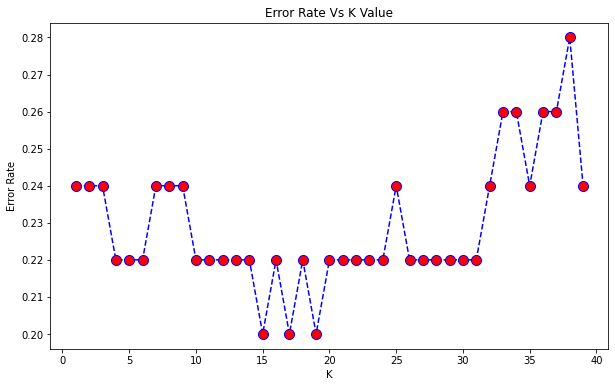

In [69]:
feature = ['principal component 1', 'principal component 2']
# Separating out the features
x = finalDf.loc[:, feature].values
# Separating out the target
y = finalDf.loc[:,['target']].values
# test_size = 0.33 and seed = 7 are initialized already
# Split data into Training and Testing data
X_pca_train, X_pca_test, y_pca_train, y_pca_test = model_selection.train_test_split(x, y, test_size=test_size, random_state=seed)

# Find the best value for “k” by fitting the train data and calculating error rate using test data, predicted target
error_rate = []
y_pca_train = np.array(y_pca_train).ravel()
for i in range(1,40):  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_pca_train,y_pca_train)
  pred_i = knn.predict(X_pca_test)
  pred_i = pred_i.reshape(50,1)
  error_rate.append(np.mean(pred_i != y_pca_test))
# Plot the Error Rate vs K-Value curve
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [70]:
# Fit the Training Data and Train the classifier with k = 15 (Minimum error rate)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_pca_train,y_pca_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [71]:
# Predict target class using test data features
predicted_pca = knn.predict(X_pca_test)

---


## 2.c. Calculate the evaluation metrics → Accuracy, Precision, Recall, F1 Score, Confusion Matrix.

---

In [72]:
# Construct the Confusion Matrix using Predicted Target and Actual Test data Target
matrix_pca = confusion_matrix(y_pca_test,predicted_pca)
print(matrix_pca)

[[14  0  0]
 [ 0 13  5]
 [ 0  5 13]]


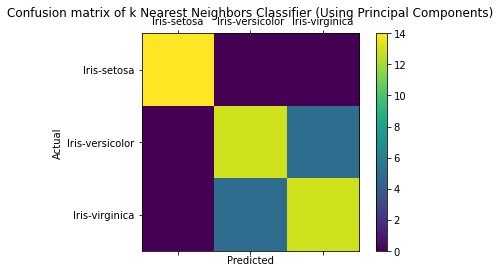

In [73]:
# Show confusion matrix plot
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix_pca)
plt.title('Confusion matrix of k Nearest Neighbors Classifier (Using Principal Components)')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [74]:
# Calculate Accuracy, Precision, Recall and F1 Score using Predicted Target and Actual Test data Target
print(classification_report(y_pca_test,predicted_pca))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.72      0.72      0.72        18
 Iris-virginica       0.72      0.72      0.72        18

       accuracy                           0.80        50
      macro avg       0.81      0.81      0.81        50
   weighted avg       0.80      0.80      0.80        50



---



### It is observed that on splitting the Inbuilt iris dataset (total of 150 samples) into 100 train samples, 50 test samples and training K-nearest neighbour algorithm over the dataset, using the optimal value of k = 15 (minimum error):

###1.   Precision = [1.00 , 0.72, 0.72]
###2.   Recall = [1.00 , 0.72, 0.72]
###3.   F1 Score = [1.00 , 0.72, 0.72]
###4.   The average Precision, Recall and F1 Score is between 0.80 and 0.81 
###5.   In confusion Matrix, number of false predictions = 10 (5 samples of the virginica is labelled wrongly as the versicolor species and 5 samples of the versicolor is labelled wrongly as the virginica species)
###6.   80% Accuracy in a balanced dataset 
###7.   Support for these evaluation metrices = 50 entries

### From these we can say that the k-Nearest Neighbour Claasifier using Principal Components gives more False Predictions than using original data. But it summarizes well the original data in fewer dimensions.

---